In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Basic exploratory plots

## Image processing

In [39]:
df = pd.read_csv("/tmp/cleanedLogs.csv")
df

,uri,nmethods,opTime,nblocks,ninsts,ts,bodySize,duration
0,/blurimage,8,233425614,7,8,2024-05-30T16:39:19.008826030Z,187330,233464656
1,/blurimage,8,74903116,7,8,2024-05-30T16:39:19.177369530Z,556650,74926793
2,/blurimage,8,77271282,7,8,2024-05-30T16:39:19.368081126Z,926182,77293143
3,/blurimage,8,88902864,7,8,2024-05-30T16:39:19.576528442Z,1294654,88925773
4,/blurimage,8,94670778,7,8,2024-05-30T16:39:19.812301479Z,1657622,94695084
...,...,...,...,...,...,...,...,...
995,/blurimage,8,1069031074,7,8,2024-05-30T17:01:34.522613182Z,38357090,1069042179
996,/blurimage,8,1234282385,7,8,2024-05-30T17:01:37.608983912Z,45295986,1234293840
997,/blurimage,8,1501168171,7,8,2024-05-30T17:01:41.445116641Z,52214782,1501178717
998,/blurimage,8,1708506589,7,8,2024-05-30T17:01:45.786078911Z,59112930,1708513573


Text(0.5, 1.0, 'Image size vs Duration')

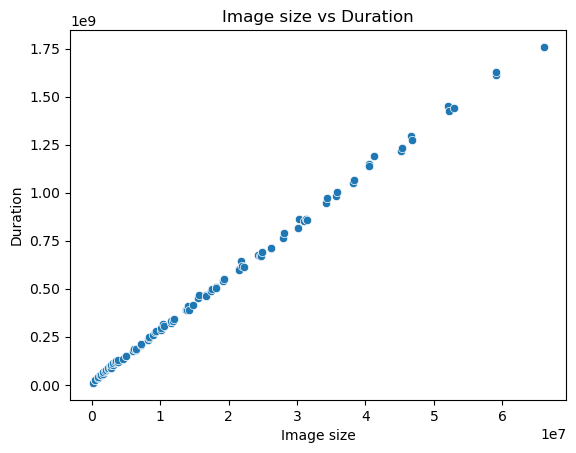

In [63]:
sns.scatterplot(data = df[["bodySize", "duration"]].groupby("bodySize").median(), x = "bodySize", y = "duration")
#sns.scatterplot(data = df, x = "bodySize", y = "duration")
plt.xlabel("Image size")
plt.ylabel("Duration")
plt.title("Image size vs Duration")

<Axes: title={'center': 'Image size vs Duration'}, xlabel='Image size', ylabel='Duration'>

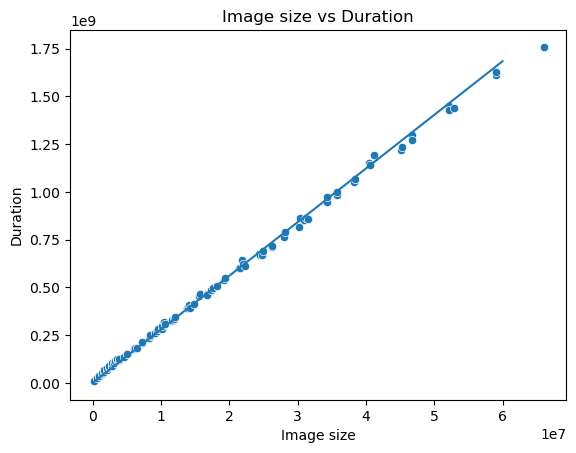

In [59]:
sns.scatterplot(data = df[["bodySize", "duration"]].groupby("bodySize").median(), x = "bodySize", y = "duration")
#sns.scatterplot(data = df, x = "bodySize", y = "duration")
plt.xlabel("Image size")
plt.ylabel("Duration")
plt.title("Image size vs Duration")

df[["bodySize", "duration"]]
up = sum(df["bodySize"] * df["duration"])
down = sum(df["bodySize"] * df["bodySize"])
alpha = up/down
x = 6 * (10**7)
sns.lineplot(data = pd.DataFrame({"x": [0, x], "y": [0, alpha * x]}), x = "x", y = "y")

26.84990352843359

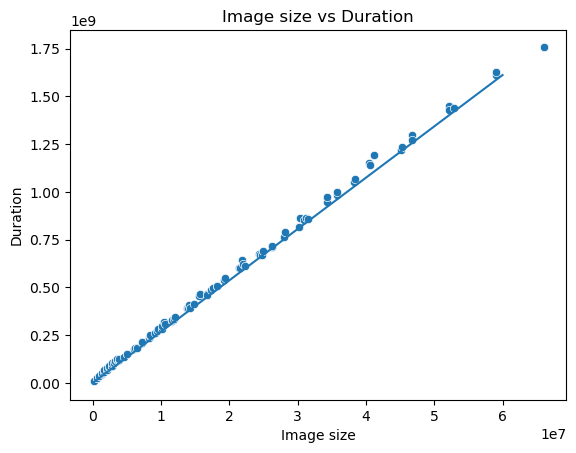

In [66]:
sns.scatterplot(data = df[["bodySize", "duration"]].groupby("bodySize").median(), x = "bodySize", y = "duration")
#sns.scatterplot(data = df, x = "bodySize", y = "duration")
plt.xlabel("Image size")
plt.ylabel("Duration")
plt.title("Image size vs Duration")

df[["bodySize", "duration"]]
up = 0
beta = 0.1
for i in range(len(df["bodySize"])):
    up = up * beta + (df["bodySize"][i] * df["duration"][i]) * (1 - beta)

for i in range(len(df["bodySize"])):
    down = down * beta + (df["bodySize"][i] * df["bodySize"][i]) * (1 - beta)
    
alpha = up/down
x = 6 * (10**7)
sns.lineplot(data = pd.DataFrame({"x": [0, x], "y": [0, alpha * x]}), x = "x", y = "y")
alpha

Text(0, 0.5, 'Number of instructions')

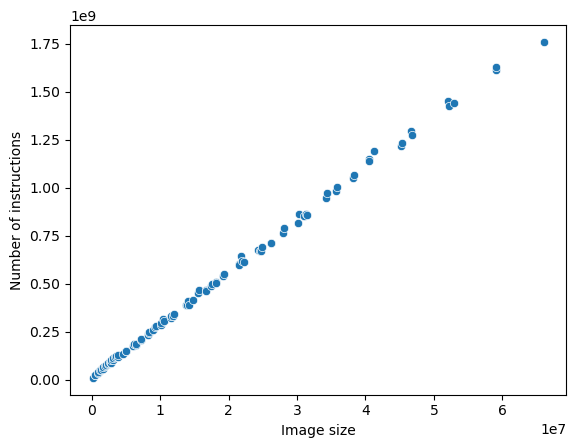

In [49]:
sns.scatterplot(data = df[["bodySize", "duration"]].groupby("bodySize").median(), x = "bodySize", y = "duration")
#sns.scatterplot(data = df, x = "bodySize", y = "duration")
plt.xlabel("Image size")
plt.ylabel("Number of instructions")

## Ray tracing

In [78]:
df = pd.read_csv("/tmp/cleanedLogs.csv")
df

,uri,scols,srows,wcols,wrows,coff,roff,aa,eye,windowDistance,...,windowWidth,cols,lightCount,nmethods,opTime,nblocks,ninsts,ts,bodySize,duration
0,/raytracer,400,300,100,100,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:19:14.286909406Z,1393,273124267
1,/raytracer,400,300,100,300,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:19:14.548117671Z,1389,188112387
2,/raytracer,400,300,100,500,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:19:14.764527682Z,1395,148041798
3,/raytracer,400,300,100,700,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:19:14.983960867Z,1395,156451598
4,/raytracer,400,300,100,900,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:19:15.253693681Z,1393,196515201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,/raytracer,400,300,900,100,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:21:45.062443202Z,1396,208747667
246,/raytracer,400,300,900,300,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:21:45.727505034Z,1392,600772259
247,/raytracer,400,300,900,500,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:21:46.809624843Z,1394,1013071078
248,/raytracer,400,300,900,700,0,0,False,[0.0 30.0 -200.0],1.0,...,0.897598,400.0,3,0,0,0,0,2024-05-30T22:21:48.308586249Z,1400,1419047109


Text(0.5, 1.0, 'Varying the number of spheres')

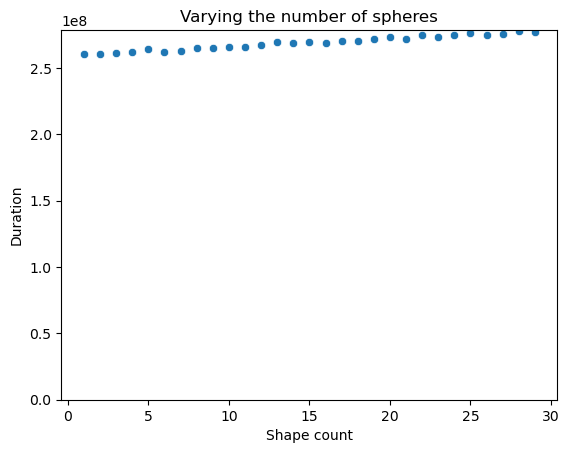

In [23]:
sns.scatterplot(data = df[["shapeCount", "duration"]].groupby("shapeCount").median(), x = "shapeCount", y = "duration")
#sns.scatterplot(data = df, x = "shapeCount", y = "duration")
plt.xlabel("Shape count")
plt.ylabel("Duration")
plt.ylim(bottom = 0)
plt.title("Varying the number of spheres")

Text(0.5, 1.0, 'Varying the number of lights')

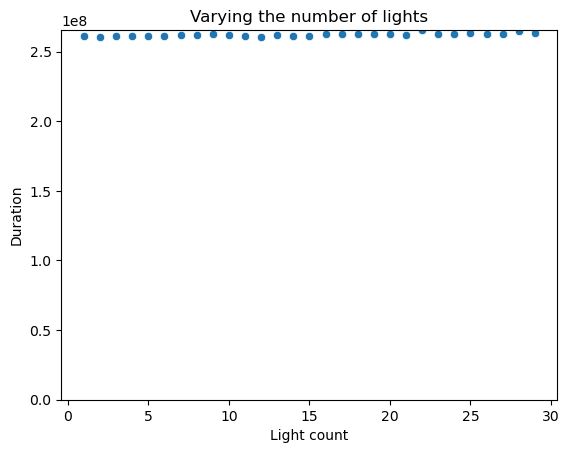

In [29]:
sns.scatterplot(data = df[["lightCount", "duration"]].groupby("lightCount").median(), x = "lightCount", y = "duration")
#sns.scatterplot(data = df, x = "shapeCount", y = "duration")
plt.xlabel("Light count")
plt.ylabel("Duration")
plt.ylim(bottom = 0)
plt.title("Varying the number of lights")

In [ ]:
# texture vs non-texture

Text(0.5, 1.0, 'Varying wcols')

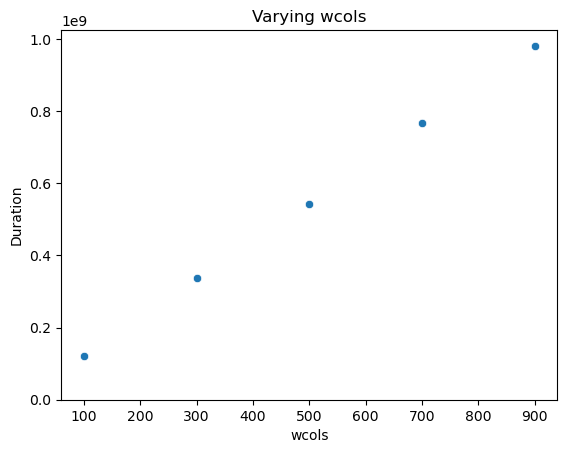

In [79]:
# change wrows wcols
sns.scatterplot(data = df[["wcols", "duration"]].groupby("wcols").median(), x = "wcols", y = "duration")

#sns.scatterplot(data = df, x = "wcols", y = "duration")
plt.xlabel("wcols")
plt.ylabel("Duration")
plt.ylim(bottom = 0)
plt.title("Varying wcols")

Text(0.5, 1.0, 'Varying wrows')

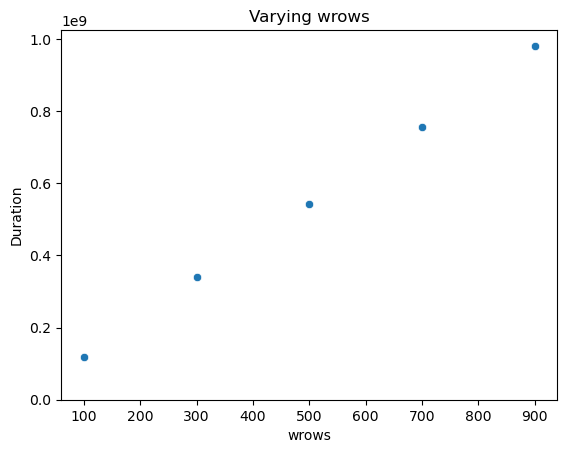

In [80]:
# change wrows wcols
sns.scatterplot(data = df[["wrows", "duration"]].groupby("wrows").median(), x = "wrows", y = "duration")
#sns.scatterplot(data = df, x = "wcols", y = "duration")
plt.xlabel("wrows")
plt.ylabel("Duration")
plt.ylim(bottom = 0)
plt.title("Varying wrows")

Text(0.5, 0.92, 'Duration vs Image Size')

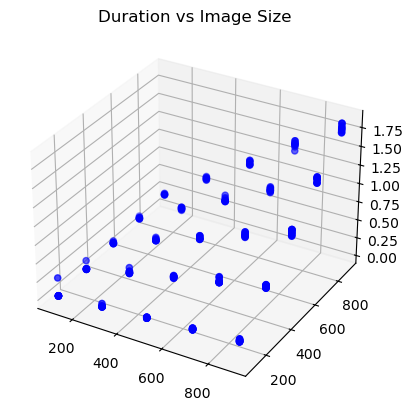

In [84]:
# change wrows wcols
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    
ax.scatter(df['wcols'], df['wrows'], df['duration'], c='b', marker='o')
plt.title("Duration vs Image Size")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


a = [624651.47994914], b = [627710.27029914]


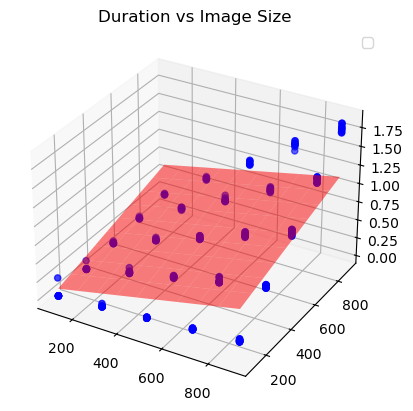

In [109]:
# change wrows wcols
df_agg = df[["wcols", "wrows", "duration"]].groupby(["wcols", "wrows"]).median().reset_index()


A = df_agg[['wcols', 'wrows']].values
B = df_agg['duration'].values.reshape(-1, 1)

A_transpose = A.T
A_transpose_A = np.dot(A_transpose, A)
A_transpose_A_inv = np.linalg.inv(A_transpose_A)
A_transpose_B = np.dot(A_transpose, B)
a, b = result = np.dot(A_transpose_A_inv, A_transpose_B)
print(f"a = {a}, b = {b}")

x_range = np.linspace(df['wcols'].min(), df['wcols'].max(), 10)
y_range = np.linspace(df['wrows'].min(), df['wrows'].max(), 10)
x, y = np.meshgrid(x_range, y_range)
z = a * x + b * y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    
ax.scatter(df['wcols'], df['wrows'], df['duration'], c='b', marker='o')
plt.title("Duration vs Image Size")

# Plot the plane
ax.plot_surface(x, y, z, color='r', alpha=0.5)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


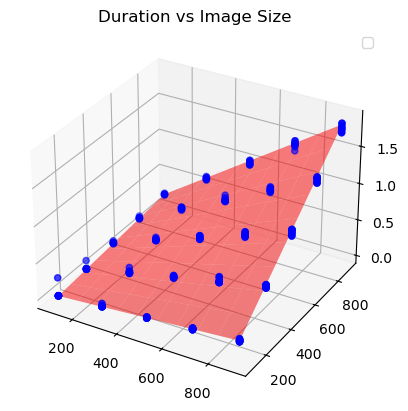

2251.4185408023063

In [120]:
# change wrows wcols
df_agg = df[["wcols", "wrows", "duration"]].groupby(["wcols", "wrows"]).median().reset_index()

df_agg["area"] = df_agg["wcols"] * df_agg[ "wrows"]

up = sum(df_agg["area"] * df_agg["duration"])
down = sum(df_agg["area"] * df_agg["area"])
a = up/down

x_range = np.linspace(df['wcols'].min(), df['wcols'].max(), 10)
y_range = np.linspace(df['wrows'].min(), df['wrows'].max(), 10)
x, y = np.meshgrid(x_range, y_range)
z = a * x * y

a_real = 2251.4185408023063
x_range = np.linspace(df['wcols'].min(), df['wcols'].max(), 10)
y_range = np.linspace(df['wrows'].min(), df['wrows'].max(), 10)
x, y = np.meshgrid(x_range, y_range)
z_real = a_real * x * y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    
ax.scatter(df['wcols'], df['wrows'], df['duration'], c='b', marker='o')
plt.title("Duration vs Image Size")

# Plot the plane
#ax.plot_surface(x, y, z, color='r', alpha=0.5)
ax.plot_surface(x, y, z_real, color='r', alpha=0.5)
plt.legend()
plt.show()
a
a_real

In [ ]:
# shape type
# new scenes by hand

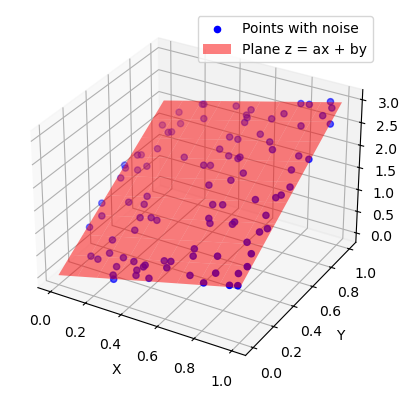

array([[1.00052746],
       [2.01517817]])

In [77]:
def generate_points(a, b, num_points=100, noise_level=0.1):
    """
    Generate points (x, y, z) based on the equation z = ax + by with added noise.

    Parameters:
    - a (float): Coefficient for x.
    - b (float): Coefficient for y.
    - num_points (int): Number of points to generate.
    - noise_level (float): Standard deviation of the noise to add.

    Returns:
    - df (pandas DataFrame): DataFrame containing the generated points.
    """
    # Generate random x and y values
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)
    
    # Compute z values without noise
    z = a * x + b * y
    
    # Add random noise to z values
    noise = np.random.normal(0, noise_level, num_points)
    z_noisy = z + noise
    
    # Create a DataFrame with the points
    df = pd.DataFrame({
        'x': x,
        'y': y,
        'z': z_noisy
    })
    
    return df
    

def plot_points_and_plane(df, a, b):
    """
    Plot the generated points and the plane z = ax + by in a 3D scatter plot.

    Parameters:
    - df (pandas DataFrame): DataFrame containing the points to plot.
    - a (float): Coefficient for x in the plane equation.
    - b (float): Coefficient for y in the plane equation.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot of the points
    ax.scatter(df['x'], df['y'], df['z'], c='b', marker='o', label='Points with noise')
    
    # Create a meshgrid for the plane
    x = np.linspace(0, 1, 10)
    y = np.linspace(0, 1, 10)
    x, y = np.meshgrid(x, y)
    z = a * x + b * y
    
    # Plot the plane
    ax.plot_surface(x, y, z, color='r', alpha=0.5, label='Plane z = ax + by')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

df = generate_points(1, 2)
plot_points_and_plane(df, 1, 2)

A = df[['x', 'y']].values
B = df['z'].values.reshape(-1, 1)

A_transpose = A.T
A_transpose_A = np.dot(A_transpose, A)
A_transpose_A_inv = np.linalg.inv(A_transpose_A)
A_transpose_B = np.dot(A_transpose, B)
result = np.dot(A_transpose_A_inv, A_transpose_B)
result